# Unsupervised Learning

**Focus:** PCA, clustering, anomaly detection using open data.
**Dataset:** Iris 

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import IsolationForest
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist

sns.set(style='whitegrid')

### Load Dataset

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Data Exploration

In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.50000

### Preprocessing

In [4]:
# Remove target for unsupervised task
features = df.drop('species', axis=1)
# Scale
scaler = StandardScaler()
scaled = scaler.fit_transform(features)
scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

### PCA Dimensionality Reduction

In [5]:
pca = PCA(n_components=2)
pcs = pca.fit_transform(scaled)
print(f'Explained variance ratio: {pca.explained_variance_ratio_}')
pca_df = pd.DataFrame(pcs, columns=['PC1', 'PC2'])
pca_df.head()

Explained variance ratio: [0.72962445 0.22850762]


,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


### Visualize PCA

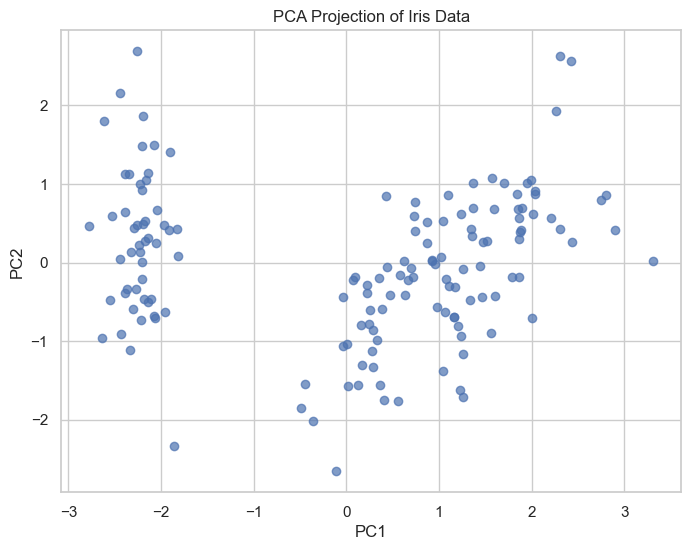

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection of Iris Data')
plt.show()

### Hierarchical Clustering

In [7]:
# Using PCA-reduced data for clarity (or scaled_features if preferred)
# Method: Ward linkage on PCA components

linked = linkage(pca_df[['PC1', 'PC2']], method='ward')

# Display the first few linkage results for understanding
print(linked[:5])


[[1.01000000e+02 1.42000000e+02 0.00000000e+00 2.00000000e+00]
 [5.80000000e+01 1.38000000e+02 1.53152065e-02 2.00000000e+00]
 [1.12000000e+02 1.45000000e+02 3.49531026e-02 2.00000000e+00]
 [1.00000000e+00 4.50000000e+01 3.85855258e-02 2.00000000e+00]
 [1.90000000e+01 4.60000000e+01 4.20242962e-02 2.00000000e+00]]


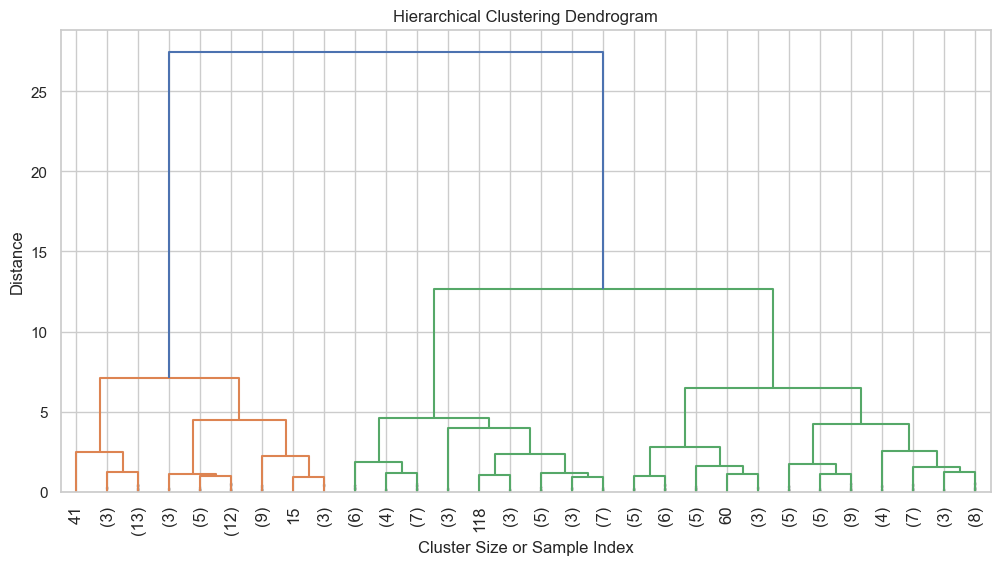

In [8]:
plt.figure(figsize=(12, 6))
dendrogram(linked,
           truncate_mode='lastp',  # show only the last p merged clusters
           p=30,
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size or Sample Index')
plt.ylabel('Distance')
plt.show()


In [9]:
# Cut the dendrogram to form flat clusters
# Here we choose 3 clusters for comparison with KMeans
hierarchical_labels = fcluster(linked, t=3, criterion='maxclust')

# Add to PCA DataFrame
pca_df['Hierarchical_Cluster'] = hierarchical_labels

# Check the distribution
print(pca_df['Hierarchical_Cluster'].value_counts())


Hierarchical_Cluster
3    61
1    50
2    39
Name: count, dtype: int64


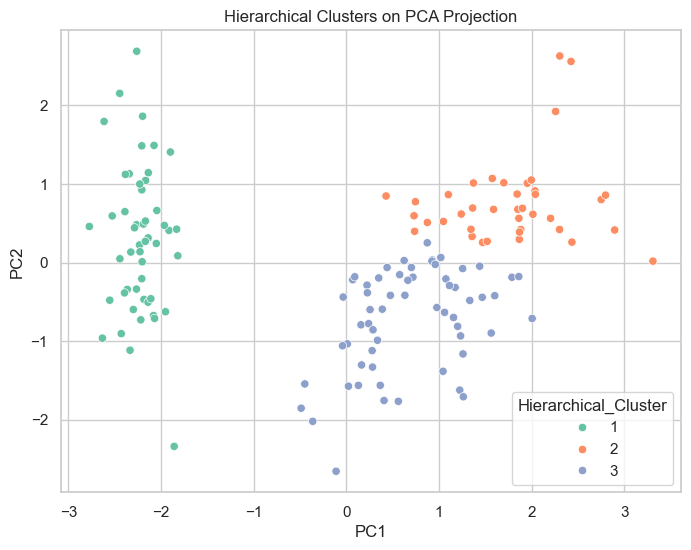

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df,
                x='PC1', y='PC2',
                hue='Hierarchical_Cluster',
                palette='Set2')
plt.title('Hierarchical Clusters on PCA Projection')
plt.show()


### KMeans Clustering

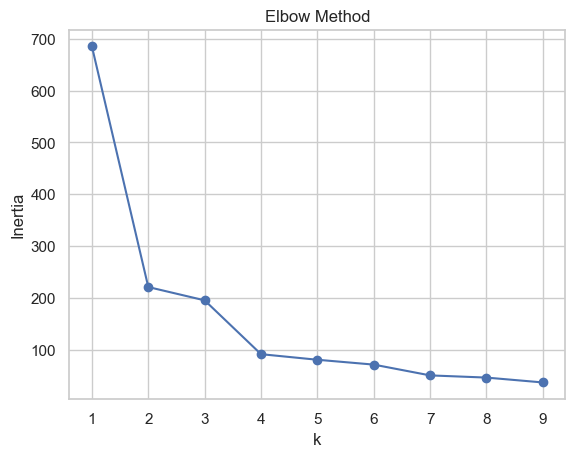

In [11]:
# Elbow method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,10), inertia, 'bo-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [12]:
# K=3 based on elbow
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pca_df)
pca_df['Cluster'] = kmeans.labels_
pca_df.head()

,PC1,PC2,Hierarchical_Cluster,Cluster
0,-2.264703,0.480027,1,1
1,-2.080961,-0.674134,1,2
2,-2.364229,-0.341908,1,2
3,-2.299384,-0.597395,1,2
4,-2.389842,0.646835,1,1


### Visualize Clusters

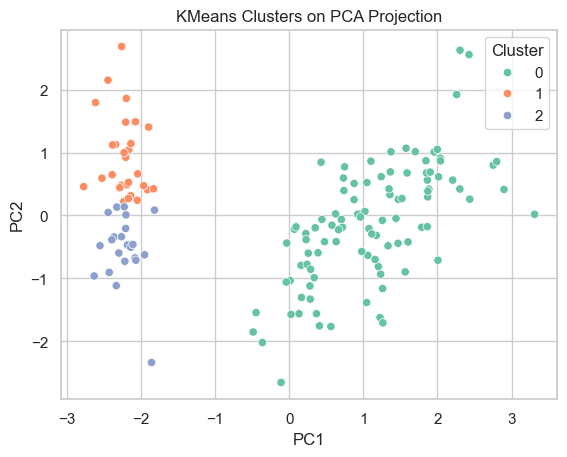

In [13]:
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2')
plt.title('KMeans Clusters on PCA Projection')
plt.show()

### Silhouette Score

In [14]:
score = silhouette_score(pca_df[['PC1', 'PC2']], pca_df['Cluster'])
print(f'Silhouette Score: {score:.3f}')

Silhouette Score: 0.520


### Anomaly Detection using Isolation Forest

In [15]:
iso = IsolationForest(contamination=0.05, random_state=42)
pca_df['Anomaly'] = iso.fit_predict(pca_df[['PC1', 'PC2']])
pca_df['Anomaly'].value_counts()

Anomaly
 1    142
-1      8
Name: count, dtype: int64

### Visualize Anomalies

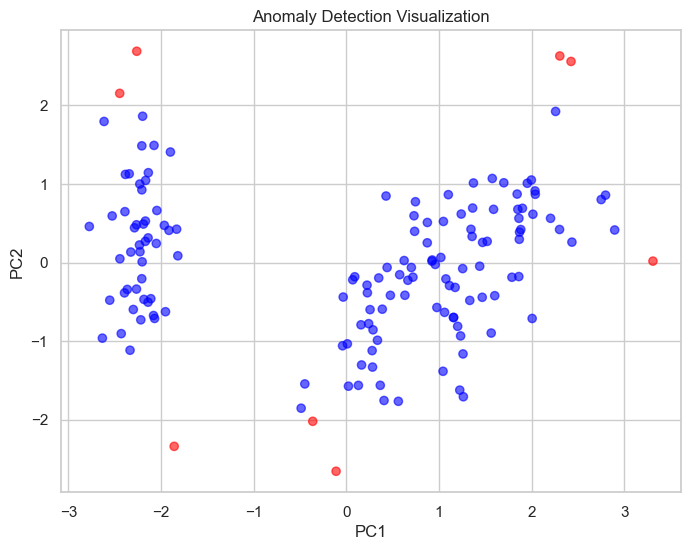

In [16]:
plt.figure(figsize=(8,6))
colors = pca_df['Anomaly'].map({1: 'blue', -1: 'red'})
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=colors, alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Anomaly Detection Visualization')
plt.show()

### Homework
Use a different dataset and try to implement the clustering

fkjfkdjfkjdfkjfkjsdfdfjkdfjkjf